In [25]:
#%matplotlib inline
#*******************************************************************************
# Dependencies and Setup
#*******************************************************************************
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#import json
#from config import api_key

#from pprint import pprint

#*******************************************************************************
# Load Data Files
#*******************************************************************************
movies_metadata_to_load = "Movie_Datasets/movies_metadata.csv"
ratings_to_load = "Movie_Datasets/ratings.csv"

print("testing")


testing


In [26]:
#*******************************************************************************
# Read the Movie Data from the file
#*******************************************************************************
movies_metadata_df = pd.read_csv(movies_metadata_to_load, low_memory=False)

print("testing")

testing


In [27]:
#*******************************************************************************
# Read the Rating Data from the file
#*******************************************************************************
ratings_df = pd.read_csv(ratings_to_load)

print("testing")


testing


In [28]:
movies_metadata_df["id"].head()

0      862
1     8844
2    15602
3    31357
4    11862
Name: id, dtype: object

In [29]:
movies_metadata_df.shape


(45466, 24)

In [30]:
ratings_df["movieId"].head()

0     110
1     147
2     858
3    1221
4    1246
Name: movieId, dtype: int64

In [31]:
# Convert the Age to a number
#movies_metadata_df[movies_metadata_df.id.apply(lambda x: x.isnumeric())]
#movies_metadata_df["id"] = pd.to_numeric(movies_metadata_df["id"])
#movies_metadata_df[pd.to_numeric(movies_metadata_df['id'], errors='coerce').notnull()].head()
num_movies_metadata_df = (movies_metadata_df.drop("id", axis=1).join(movies_metadata_df["id"].apply(pd.to_numeric, errors='coerce')))
num_movies_metadata_df["id"] = pd.to_numeric(num_movies_metadata_df["id"])
#movies_metadata_df["id"].head()

In [32]:
num_movies_metadata_df.shape

(45466, 24)

In [33]:
num_movies_metadata_df["id"].head()

0      862.0
1     8844.0
2    15602.0
3    31357.0
4    11862.0
Name: id, dtype: float64

In [34]:
#movies_metadata_df.head(3)
#print out the columns in the movies_metadata_df dataframe
num_movies_metadata_df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'id'],
      dtype='object')

In [35]:
#print first a few of the rows from the ratings_df dataframe
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


In [36]:
# Group the movie rating data by movie and average the ratings provided by the individual users.
ave_movie_rating = ratings_df.groupby(["movieId"]).mean()
ave_movie_rating.head()


,userId,rating,timestamp
movieId,,,
1,5188.554271,3.897799,1.119265e+09
2,5259.381089,3.204394,1.100198e+09
3,5225.826307,3.181282,9.703165e+08
4,5064.476636,2.859813,9.443451e+08
5,5356.526656,3.102585,9.967256e+08


In [37]:
print(f"There are {ave_movie_rating.shape[0]} movies included in this dataset.")

There are 20499 movies included in this dataset.


In [38]:
renamed_movies_metadata_df = num_movies_metadata_df.rename(columns={"id":"movieId"})
renamed_movies_metadata_df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'movieId'],
      dtype='object')

In [39]:
renamed_movies_metadata_df["movieId"].describe()

count     45463.000000
mean     108359.918813
std      112460.749278
min           2.000000
25%       26449.500000
50%       60003.000000
75%      157328.000000
max      469172.000000
Name: movieId, dtype: float64

In [40]:
ave_movie_rating.head()

,userId,rating,timestamp
movieId,,,
1,5188.554271,3.897799,1.119265e+09
2,5259.381089,3.204394,1.100198e+09
3,5225.826307,3.181282,9.703165e+08
4,5064.476636,2.859813,9.443451e+08
5,5356.526656,3.102585,9.967256e+08


In [41]:
merge_table = pd.merge(renamed_movies_metadata_df, ave_movie_rating, on="movieId")
merge_table.head(2)

,adult,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,status,tagline,title,video,vote_average,vote_count,movieId,userId,rating,timestamp
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,...,Released,NaN,Toy Story,False,7.7,5415.0,862.0,6771.818182,3.454545,9.273843e+08
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,...,Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,8844.0,8091.500000,4.125000,1.207761e+09


In [42]:
merge_table.columns


Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'movieId', 'userId', 'rating',
       'timestamp'],
      dtype='object')

In [43]:
trimmed_merge_table = merge_table[["budget", "genres", "imdb_id", "production_countries", "release_date", "runtime", 
                                   "revenue", "title", "vote_average", "vote_count", "movieId", "rating", "popularity"]]

In [44]:
trimmed_merge_table.count()

budget                  5086
genres                  5086
imdb_id                 5085
production_countries    5086
release_date            5084
runtime                 5078
revenue                 5086
title                   5086
vote_average            5086
vote_count              5086
movieId                 5086
rating                  5086
popularity              5086
dtype: int64

In [45]:
trimmed_merge_table = trimmed_merge_table.dropna(how='any')

In [46]:
trimmed_merge_table.count()

budget                  5075
genres                  5075
imdb_id                 5075
production_countries    5075
release_date            5075
runtime                 5075
revenue                 5075
title                   5075
vote_average            5075
vote_count              5075
movieId                 5075
rating                  5075
popularity              5075
dtype: int64

In [47]:
trimmed_merge_table.head()

,budget,genres,imdb_id,production_countries,release_date,runtime,revenue,title,vote_average,vote_count,movieId,rating,popularity
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",tt0114709,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,81.0,373554033.0,Toy Story,7.7,5415.0,862.0,3.454545,21.946943
1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",tt0113497,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,104.0,262797249.0,Jumanji,6.9,2413.0,8844.0,4.125000,17.015539
2,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",tt0113277,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,170.0,187436818.0,Heat,7.7,1886.0,949.0,3.850515,17.924927
3,58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",tt0113189,"[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",1995-11-16,130.0,352194034.0,GoldenEye,6.6,1194.0,710.0,2.930000,14.686036
4,98000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",tt0112760,"[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",1995-12-22,119.0,10017322.0,Cutthroat Island,5.7,137.0,1408.0,3.692593,7.284477


In [48]:
trimmed_merge_table["popularity"].max()

'96.272374'

In [49]:
total_num_movies = trimmed_merge_table.shape[0]
print(f"There are {total_num_movies} movies included in this reduced dataset.")

There are 5075 movies included in this reduced dataset.


In [50]:
rating_success = 0

successful_movies_df = trimmed_merge_table.loc[trimmed_merge_table["rating"] >= rating_success, :]
print(f"There are {successful_movies_df.shape[0]} successful movies with average ratings greater than {rating_success}")
percentage_successful_movies = (successful_movies_df.shape[0]/total_num_movies) * 100
#formatted_successful_movies = percentage_successful_movies.map("{:.2f}%".format)
#formatted_successful_movies = str(percentage_successful_movies)
formatted_successful_movies = "{:.2f}%".format(float(percentage_successful_movies))

print(f"The percentage of successful movies is {formatted_successful_movies}")
#print(percentage_successful_movies)

There are 5075 successful movies with average ratings greater than 0
The percentage of successful movies is 100.00%


In [51]:
formatted_successful_movies = "{:.2f}%".format(float(percentage_successful_movies))
print(formatted_successful_movies)

100.00%


In [52]:
#successful_movies_df["runtime"] = pd.to_numeric(successful_movies_df["runtime"])
trimmed_runtime_movies_df = successful_movies_df.loc[successful_movies_df["runtime"] < 900, :]
trimmed_runtime_movies_df.shape


(5075, 13)

In [53]:
# Create the bins in which Data will be held
# Bins are 0, 60, 70, 80, 90, 100
#bins = [0, 50, 100, 150, 200, 250, 900]
bins = [0, 60, 120, 180, 900]

# Create the names for the four bins
#group_names = ["Xshort", "short", "med", "long", "Xlong", "XXlong" ]
group_names = ["< 1 Hrs", "1-2 Hrs", "2-3 Hrs", "> 3 Hrs" ]


In [ ]:
#Create Box and Whisker Plot


In [54]:
trimmed_runtime_movies_df["Runtime Breakdown"] = pd.cut(trimmed_runtime_movies_df["runtime"], bins, labels=group_names)
trimmed_runtime_movies_df.head(1)

,budget,genres,imdb_id,production_countries,release_date,runtime,revenue,title,vote_average,vote_count,movieId,rating,popularity,Runtime Breakdown
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",tt0114709,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,81.0,373554033.0,Toy Story,7.7,5415.0,862.0,3.454545,21.946943,1-2 Hrs


In [55]:
ratings_runtime_count_df = trimmed_runtime_movies_df[["rating", "runtime", "Runtime Breakdown"]]
ratings_runtime_count_df = ratings_runtime_count_df.groupby("Runtime Breakdown")
ratings_runtime_count_df.count()["runtime"]

Runtime Breakdown
< 1 Hrs     164
1-2 Hrs    3925
2-3 Hrs     841
> 3 Hrs      82
Name: runtime, dtype: int64

In [56]:
#Create Box & Whisker Plot Comparing Ratings and Revenue
revenue_ratings_df.plot(kind="box")

NameError: name 'revenue_ratings_df' is not defined

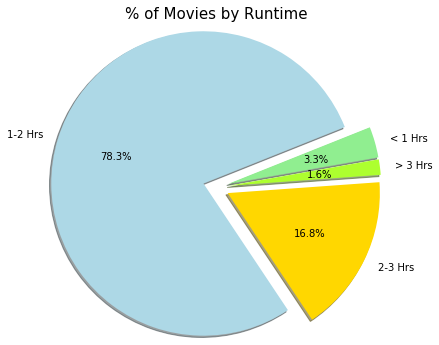

In [57]:
#*******************************************************************************
# Define appearance for the pie chart
#*******************************************************************************
#        [Xshort, short,         med,          long,  Xlong,    XXlong]
#colors = ["gold","lightskyblue", "lightcoral", "blue","orange", "red"]
colors = ["lightgreen","lightblue", "gold", "greenyellow"]
explode = (0.15,0.15,0.15,0.15)

#*******************************************************************************
# Define the title for the pie chart
#*******************************************************************************
plt.title("% of Movies by Runtime", y=1.25, fontsize=15)

#*******************************************************************************
# Define pie chart
#*******************************************************************************
plt.pie(ratings_runtime_count_df.count()["runtime"], explode=explode, 
        labels=group_names, colors=colors, autopct="%1.1f%%", shadow=True, 
        startangle=10, radius=1.75)

#*******************************************************************************
# Show Figure
#*******************************************************************************
#plt.tight_layout()
plt.show()

In [58]:
# Bar chart of average rating / runtime
ratings_runtime_ave_df = trimmed_runtime_movies_df[["rating", "runtime", "Runtime Breakdown"]]
ratings_runtime_ave_df = ratings_runtime_ave_df.groupby("Runtime Breakdown").mean()
#ratings_runtime_ave_df.mean()
ratings_runtime_ave_df.head()

,rating,runtime
Runtime Breakdown,,
< 1 Hrs,3.273074,31.884146
1-2 Hrs,3.278365,97.243567
2-3 Hrs,3.245645,136.845422
> 3 Hrs,3.157958,222.280488


In [59]:
# Filter the DataFrame down only to those columns to chart
runtime_and_ave_df = ratings_runtime_ave_df[["rating"]]

# Set the index to be "State" so they will be used as labels
#state_and_inches = state_and_inches.set_index("State")

runtime_and_ave_df.head()

,rating
Runtime Breakdown,
< 1 Hrs,3.273074
1-2 Hrs,3.278365
2-3 Hrs,3.245645
> 3 Hrs,3.157958


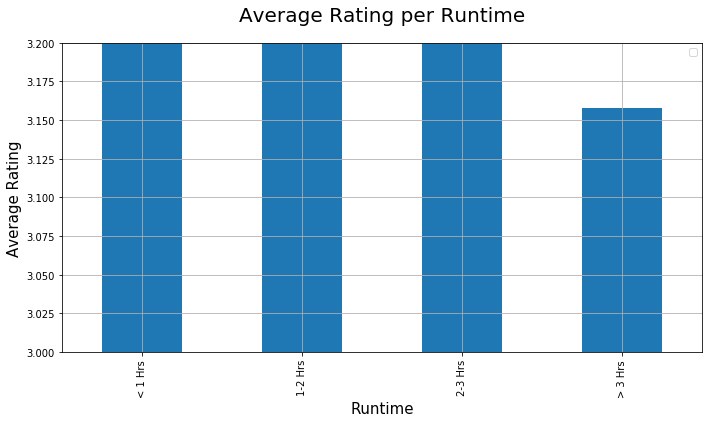

In [60]:
# Use DataFrame.plot() in order to create a bar chart of the data
runtime_and_ave_df.plot(kind="bar", figsize=(10,6))

# Set a title for the chart
plt.title("Average Rating per Runtime", y=1.05, fontsize=20)
plt.xlabel("Runtime", y=1.05, fontsize=15)
plt.ylabel("Average Rating", fontsize=15)
plt.legend("")


#runtime_and_ave_df.set_xlim([xmin,xmax])
plt.ylim([3,3.2])

#*******************************************************************************
#Add the grid to the chart
#*******************************************************************************
plt.grid()

plt.tight_layout()
plt.show()

Text(0, 0.5, '')

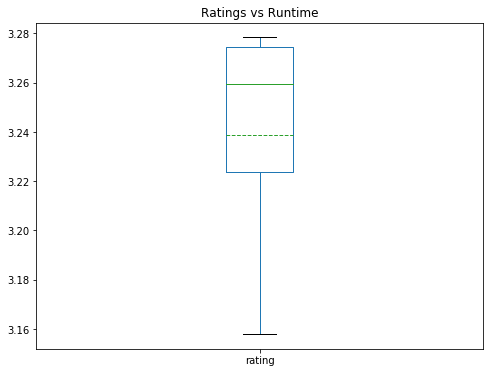

In [62]:
#Create Box & Whisker plot
runtime_and_ave_df.plot(kind="box", figsize=(8,6), showmeans=True, meanline=True)

#Chart Titles/Labels
plt.title("Ratings vs Runtime")
plt.xlabel("")
plt.ylabel("")